<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>


<h1 align=center><font size = 5>Exercise: Hierarchical Clustering in R</font></h1>

In this exercise, we will use the Hierarchical clustering algorithm to cluster weather station data. let's start playing with the data. We will be working according to the following workflow: </font>
1. Loading data
- Overview data
- Data cleaning
- Data selection
- Clusteing

In this notebook, we will use the weather data, and will be using only the columns with names listed in <font color = "green">green</font>.

<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>



### Install and import required libraries

In [1]:
# import libraries
install.packages('ggdendro')
install.packages('ggplot2')
library(ggdendro)
library(ggplot2)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### 1. Loading the data
Since the dataset was uploaded to a Box folder, we can use the ***download.file*** command to download the dataset, and load the data using the ***read.csv*** command.

In [2]:
# download file and save it to weather and load data
download.file("https://ibm.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv", destfile = "WeatherStations.csv", quiet = FALSE)
WeatherStations <- read.csv("WeatherStations.csv", sep =',')

### 2. Overview of the data
Using __head__ and __str__, take a quick look in the data before processing it.

In [3]:
## your ccode here:

head(WeatherStations)
str(WeatherStations)


Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,⋯,DwP,P.N,S_G,Pd,BS,DwBS,BS.,HDD,CDD,Stn_No
CHEMAINUS,48.935,-123.742,BC,8.2,0,NA,13.5,0,1.0,⋯,0,NA,0,12,NA,NA,NA,273.3,0,1011500
COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0,3.0,15.0,0,-3.0,⋯,0,104,0,12,NA,NA,NA,307.0,0,1012040
LAKE COWICHAN,48.829,-124.052,BC,6.8,13,2.8,16.0,9,-2.5,⋯,9,NA,NA,11,NA,NA,NA,168.1,0,1012055
DISCOVERY ISLAND,48.425,-123.226,BC,NA,NA,NA,12.5,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1012475
DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2,3.4,14.5,2,-1.0,⋯,2,NA,NA,11,NA,NA,NA,267.7,0,1012573
ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0,NA,13.1,0,1.9,⋯,8,NA,NA,12,NA,NA,NA,258.6,0,1012710


'data.frame':	1341 obs. of  25 variables:
 $ Stn_Name: Factor w/ 1318 levels "100 MILE HOUSE 6NE",..: 203 255 616 298 307 347 413 680 717 799 ...
 $ Lat     : num  48.9 48.8 48.8 48.4 48.7 ...
 $ Long    : num  -124 -124 -124 -123 -124 ...
 $ Prov    : Factor w/ 13 levels "AB","BC","MB",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Tm      : num  8.2 7 6.8 NA 7.7 8.8 8.9 7.2 NA NA ...
 $ DwTm    : int  0 0 13 NA 2 0 7 1 NA NA ...
 $ D       : num  NA 3 2.8 NA 3.4 NA NA NA NA NA ...
 $ Tx      : num  13.5 15 16 12.5 14.5 13.1 13.5 12.7 NA NA ...
 $ DwTx    : int  0 0 9 0 2 0 7 1 NA NA ...
 $ Tn      : num  1 -3 -2.5 NA -1 1.9 2 2.2 NA NA ...
 $ DwTn    : int  0 0 9 NA 2 0 7 0 NA NA ...
 $ S       : num  0 0 0 NA 0 NA 0 NA 0 0 ...
 $ DwS     : int  0 0 9 NA 2 NA 7 NA 0 0 ...
 $ S.N     : int  NA 0 NA NA NA NA NA NA 0 0 ...
 $ P       : num  179 259 265 NA 168 ...
 $ DwP     : int  0 0 9 NA 2 8 7 10 0 0 ...
 $ P.N     : int  NA 104 NA NA NA NA NA NA 95 114 ...
 $ S_G     : int  0 0 NA NA NA NA 0 NA 0 0 

<div align="right">
<a href="#p1" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p1" class="collapse">
```
head(WeatherStations)
str(WeatherStations)
```
</div>

### 3. Cleaning the data

We are going to cluster the stations based on the Lat, Long, and Total Precepetation. Is there any missing Lat, Long or Total Precipitation ? If yes, remove entries that have missing values.

In [4]:
## your ccode here:

WeatherStations <- WeatherStations[complete.cases( WeatherStations$Lat, WeatherStations$Long, WeatherStations$P),]
head(WeatherStations)


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,⋯,DwP,P.N,S_G,Pd,BS,DwBS,BS.,HDD,CDD,Stn_No
1,CHEMAINUS,48.935,-123.742,BC,8.2,0,NA,13.5,0,1.0,⋯,0,NA,0,12,NA,NA,NA,273.3,0,1011500
2,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0,3.0,15.0,0,-3.0,⋯,0,104,0,12,NA,NA,NA,307.0,0,1012040
3,LAKE COWICHAN,48.829,-124.052,BC,6.8,13,2.8,16.0,9,-2.5,⋯,9,NA,NA,11,NA,NA,NA,168.1,0,1012055
5,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2,3.4,14.5,2,-1.0,⋯,2,NA,NA,11,NA,NA,NA,267.7,0,1012573
6,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0,NA,13.1,0,1.9,⋯,8,NA,NA,12,NA,NA,NA,258.6,0,1012710
7,GALIANO NORTH,48.985,-123.573,BC,8.9,7,NA,13.5,7,2.0,⋯,7,NA,0,10,NA,NA,NA,191.7,0,10130MN


<div align="right">
<a href="#p2" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p2" class="collapse">
```
WeatherStations <- WeatherStations[complete.cases( WeatherStations$Lat, WeatherStations$Long, WeatherStations$P),]
head(WeatherStations)
```
</div>

Filter for any entries that lie outside of Canada

In [5]:
# Canada Coordinates
llon <- -140    # lower limit longitude
ulon <- -50     # upper limit longitide
llat <- 40      # lower limit latitude
ulat <- 65      # upper limit latitude
## your ccode here:

filtered_stations <- subset(WeatherStations, Lat > llat & Lat < ulat & Long > llon & Long < ulon)
rownames(filtered_stations) <- 1:nrow(filtered_stations)
head(filtered_stations)



Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,⋯,DwP,P.N,S_G,Pd,BS,DwBS,BS.,HDD,CDD,Stn_No
CHEMAINUS,48.935,-123.742,BC,8.2,0,NA,13.5,0,1.0,⋯,0,NA,0,12,NA,NA,NA,273.3,0,1011500
COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0,3.0,15.0,0,-3.0,⋯,0,104,0,12,NA,NA,NA,307.0,0,1012040
LAKE COWICHAN,48.829,-124.052,BC,6.8,13,2.8,16.0,9,-2.5,⋯,9,NA,NA,11,NA,NA,NA,168.1,0,1012055
DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2,3.4,14.5,2,-1.0,⋯,2,NA,NA,11,NA,NA,NA,267.7,0,1012573
ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0,NA,13.1,0,1.9,⋯,8,NA,NA,12,NA,NA,NA,258.6,0,1012710
GALIANO NORTH,48.985,-123.573,BC,8.9,7,NA,13.5,7,2.0,⋯,7,NA,0,10,NA,NA,NA,191.7,0,10130MN


<div align="right">
<a href="#p3" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p3" class="collapse">
```
filtered_stations <- subset(WeatherStations, Lat > llat & Lat < ulat & Long > llon & Long < ulon)
rownames(filtered_stations) <- 1:nrow(filtered_stations)
head(filtered_stations)
```
</div>

### 4. Data selection
Lets Randomly sample dataset for thirty weather stations because we dont want to show a very big dendogram.

In [6]:
# NOTE: This is why the dendogram is basically unusable in most situations.

number_stations <- 30 # number of stations
set.seed(123) # ensure reproducibility
random_stations <- filtered_stations[sample.int(nrow(filtered_stations))[1:number_stations],]
rownames(random_stations) <- 1:nrow(random_stations)
head(random_stations)

Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,⋯,DwP,P.N,S_G,Pd,BS,DwBS,BS.,HDD,CDD,Stn_No
FORESTBURG AGCM,52.548,-112.123,AB,-11.1,0,NA,6.4,0,-26.5,⋯,0,NA,NA,7,NA,NA,NA,815.2,0,3012653
ST NAZAIRE,45.733,-72.617,QC,-17.1,11,-8.3,-3.0,9,-31.0,⋯,2,NA,76,11,NA,NA,NA,596.6,0,7027588
EDSON CLIMATE,53.580,-116.453,AB,-7.6,0,NA,12.9,0,-28.2,⋯,0,NA,35,6,NA,NA,NA,717.7,0,3062246
MATAGAMI A,49.762,-77.803,QC,-24.7,1,NA,-5.7,1,-39.2,⋯,2,NA,NA,0,NA,NA,NA,1153.6,0,7094636
ST MARGARET'S BAY,44.700,-63.900,NS,-7.5,0,-2.4,5.0,0,-21.0,⋯,0,113,0,10,NA,NA,NA,713.8,0,8204800
GOLD RIVER TOWNSITE,49.779,-126.055,BC,7.5,0,4.2,16.0,0,-3.0,⋯,0,100,0,15,NA,NA,NA,294.5,0,1033232


### 5. Clustering

In this exercise, we will use Agglomorative algorithm. It would be interesting to assign weather stations clustered by total precipitation. Cluster data using total precipitation and location, and then use __ggdendrogram__ to plot dendrogram of clusters:

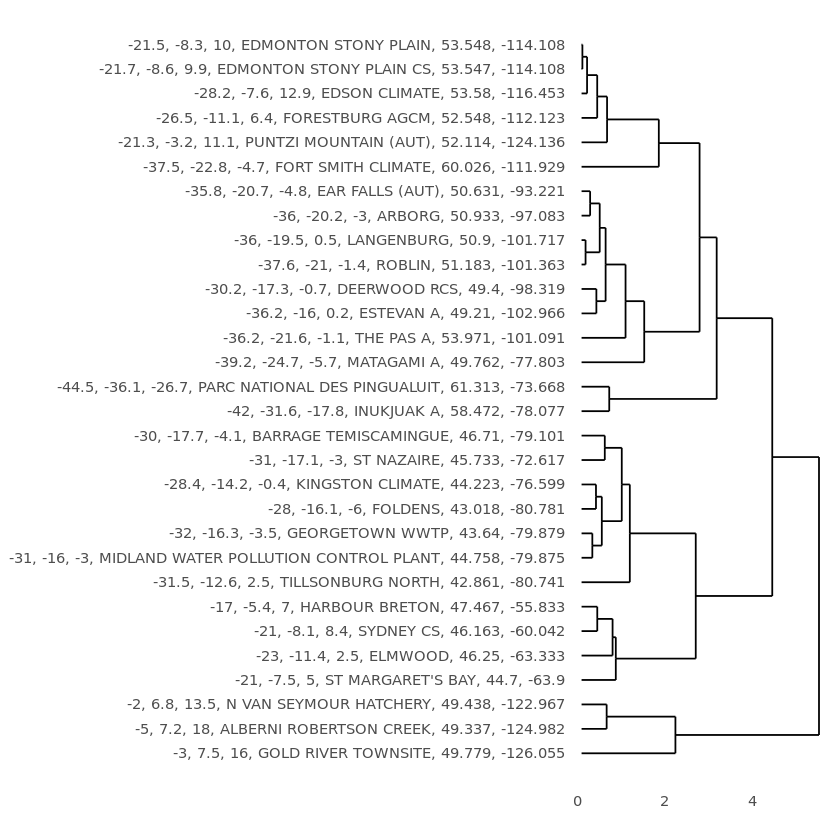

In [7]:
## your ccode here:

temp_loc_dataframe <- scale(data.frame("TotalPrecipitation" = random_stations$P,
                                       "Lat" = random_stations$Lat,
                                       "Long" = random_stations$Long), 
                            center = TRUE, scale = TRUE)

rownames(temp_loc_dataframe) <- paste(random_stations$Tn, random_stations$Tm, random_stations$Tx, random_stations$Stn_Name, random_stations$Lat, random_stations$Long, sep=", ")

D <- dist(as.matrix(temp_loc_dataframe))
hc <- hclust(D)
ggdendrogram(hc, rotate = TRUE, theme_dendro = TRUE, color = "tomato")



<div align="right">
<a href="#p4" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p4" class="collapse">
```
temp_loc_dataframe <- scale(data.frame("TotalPrecipitation" = random_stations$P,
                                       "Lat" = random_stations$Lat,
                                       "Long" = random_stations$Long), 
                            center = TRUE, scale = TRUE)

rownames(temp_loc_dataframe) <- paste(random_stations$Tn, random_stations$Tm, random_stations$Tx, random_stations$Stn_Name, random_stations$Lat, random_stations$Long, sep=", ")

D <- dist(as.matrix(temp_loc_dataframe))
hc <- hclust(D)
ggdendrogram(hc, rotate = TRUE, theme_dendro = TRUE, color = "tomato")
```
</div>

Choose threshold of __1.5__ to create distinct clusters:

In [8]:
## your ccode here:

threshold <- 1.5 # define threshold

groups <- cutree(hc, h=threshold) # cut three at defined threshold
num_clusters <- max(groups) # number of clusters

# show groups
groups


-26.5, -11.1, 6.4, FORESTBURG AGCM, 52.548, -112.123 
                                                                   1 
                         -31, -17.1, -3, ST NAZAIRE, 45.733, -72.617 
                                                                   2 
                   -28.2, -7.6, 12.9, EDSON CLIMATE, 53.58, -116.453 
                                                                   1 
                     -39.2, -24.7, -5.7, MATAGAMI A, 49.762, -77.803 
                                                                   3 
                        -21, -7.5, 5, ST MARGARET'S BAY, 44.7, -63.9 
                                                                   4 
                  -3, 7.5, 16, GOLD RIVER TOWNSITE, 49.779, -126.055 
                                                                   5 
                          -37.6, -21, -1.4, ROBLIN, 51.183, -101.363 
                                                                   3 
                      -42, -31.6, -17.8, INUKJUAK A, 58.472, -78.077 
                                                                   6 
                             -36, -20.2, -3, ARBORG, 50.933, -97.083 
                                                                   3 
                         -36, -19.5, 0.5, LANGENBURG, 50.9, -101.717 
                                                                   3 
                            -23, -11.4, 2.5, ELMWOOD, 46.25, -63.333 
                                                                   4 
                         -36.2, -16, 0.2, ESTEVAN A, 49.21, -102.966 
                                                                   3 
               -31.5, -12.6, 2.5, TILLSONBURG NORTH, 42.861, -80.741 
                                                                   2 
                     -36.2, -21.6, -1.1, THE PAS A, 53.971, -101.091 
                                                                   3 
          -21.3, -3.2, 11.1, PUNTZI MOUNTAIN (AUT), 52.114, -124.136 
                                                                   1 
  -44.5, -36.1, -26.7, PARC NATIONAL DES PINGUALUIT, 61.313, -73.668 
                                                                   6 
            -37.5, -22.8, -4.7, FORT SMITH CLIMATE, 60.026, -111.929 
                                                                   7 
              -5, 7.2, 18, ALBERNI ROBERTSON CREEK, 49.337, -124.982 
                                                                   8 
         -21.7, -8.6, 9.9, EDMONTON STONY PLAIN CS, 53.547, -114.108 
                                                                   1 
                          -21, -8.1, 8.4, SYDNEY CS, 46.163, -60.042 
                                                                   4 
             -30, -17.7, -4.1, BARRAGE TEMISCAMINGUE, 46.71, -79.101 
                                                                   2 
                            -28, -16.1, -6, FOLDENS, 43.018, -80.781 
                                                                   2 
               -28.4, -14.2, -0.4, KINGSTON CLIMATE, 44.223, -76.599 
                                                                   2 
                       -17, -5.4, 7, HARBOUR BRETON, 47.467, -55.833 
                                                                   4 
-31, -16, -3, MIDLAND WATER POLLUTION CONTROL PLANT, 44.758, -79.875 
                                                                   2 
                   -32, -16.3, -3.5, GEORGETOWN WWTP, 43.64, -79.879 
                                                                   2 
                     -30.2, -17.3, -0.7, DEERWOOD RCS, 49.4, -98.319 
                                                                   3 
                -35.8, -20.7, -4.8, EAR FALLS (AUT), 50.631, -93.221 
                                                                   3 
             -21.5, -8.3, 10, EDMONTON STONY PLAIN, 53.548, -114.108 
                          

<div align="right">
<a href="#p5" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p5" class="collapse">
```
threshold <- 1.5 # define threshold

groups <- cutree(hc, h=threshold) # cut three at defined threshold
num_clusters <- max(groups) # number of clusters

# show groups
groups
    
```
</div>

### Add cluster labels to dataframe

In [9]:
random_stations <- cbind(random_stations, clusters =as.factor(as.vector(groups)))
head(random_stations)

Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,⋯,P.N,S_G,Pd,BS,DwBS,BS.,HDD,CDD,Stn_No,clusters
FORESTBURG AGCM,52.548,-112.123,AB,-11.1,0,NA,6.4,0,-26.5,⋯,NA,NA,7,NA,NA,NA,815.2,0,3012653,1
ST NAZAIRE,45.733,-72.617,QC,-17.1,11,-8.3,-3.0,9,-31.0,⋯,NA,76,11,NA,NA,NA,596.6,0,7027588,2
EDSON CLIMATE,53.580,-116.453,AB,-7.6,0,NA,12.9,0,-28.2,⋯,NA,35,6,NA,NA,NA,717.7,0,3062246,1
MATAGAMI A,49.762,-77.803,QC,-24.7,1,NA,-5.7,1,-39.2,⋯,NA,NA,0,NA,NA,NA,1153.6,0,7094636,3
ST MARGARET'S BAY,44.700,-63.900,NS,-7.5,0,-2.4,5.0,0,-21.0,⋯,113,0,10,NA,NA,NA,713.8,0,8204800,4
GOLD RIVER TOWNSITE,49.779,-126.055,BC,7.5,0,4.2,16.0,0,-3.0,⋯,100,0,15,NA,NA,NA,294.5,0,1033232,5


### Check out clusters centroidsd

In [10]:
clusters_centers_dataframe <- aggregate(random_stations[, c("Lat", "Long")], list(cluster = random_stations$clusters), mean)
clusters_centers_dataframe

cluster,Lat,Long
1,53.06740,-116.18560
2,44.42043,-78.51329
3,50.74875,-96.69537
4,46.14500,-60.77700
5,49.77900,-126.05500
6,59.89250,-75.87250
7,60.02600,-111.92900
8,49.38750,-123.97450


## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler for Mac users](https://cocl.us/ML0151EN_SPSSMod_mac) and [SPSS Modeler for Windows users](https://cocl.us/ML0151EN_SPSSMod_win)

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0151EN_DSX)

### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, [Alex Aklson](https://www.linkedin.com/in/aklson/)

<hr>
Copyright &copy; 2017 [IBM Cognitive Class](https://cognitiveclass.ai/?utm_source=ML0151&utm_medium=lab&utm_campaign=cclab). This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).